# Project 3 - Charts & Graphs
-- To Go Full-on Electric, or Not :)

In [1]:
import warnings
warnings.filterwarnings('ignore')

# DEPENDENCIES AND SETUP
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

%matplotlib notebook
%matplotlib inline

# LOAD FILES
fs_load = Path("fuel_stations.csv")


# READ FILE INTO PANDA DATAFRAME
fs_df = pd.read_csv(fs_load, encoding="UTF-8")

In [2]:
# DISPLAY COLUMNS
fs_df.columns

Index(['_id', 'id', 'fuel_type_code', 'station_name', 'street_address', 'city',
       'state', 'country', 'status_code', 'expected_date', 'access_code',
       'owner_type_code', 'federal_agency', 'ev_level1_evse_num',
       'ev_level2_evse_num', 'ev_dc_fast_num', 'ev_other_evse',
       'ev_connector_types', 'ev_network', 'ev_pricing', 'ev_renewable_source',
       'latitude', 'longitude', 'open_date', 'date_last_confirmed',
       'facility_type', 'restricted_access'],
      dtype='object')

In [3]:
# DISPLAY FIRST 5 RECORDS
fs_df.head()

,_id,id,fuel_type_code,station_name,street_address,city,state,country,status_code,expected_date,...,ev_connector_types,ev_network,ev_pricing,ev_renewable_source,latitude,longitude,open_date,date_last_confirmed,facility_type,restricted_access
0,64ce71f5e4c0a798bc65120a,73,CNG,Arkansas Oklahoma Gas Corp,2100 S Waldron Rd,Fort Smith,AR,US,E,NaN,...,NaN,NaN,NaN,NaN,35.362213,-94.375338,1997-01-01,2023-02-13,UTILITY,False
1,64ce71f5e4c0a798bc65120b,124,CNG,Con Edison - W 29th St Service Center,281 11th Ave,New York,NY,US,E,NaN,...,NaN,NaN,NaN,NaN,40.752903,-74.005831,2014-05-01,2022-06-14,UTILITY,False
2,64ce71f5e4c0a798bc65120c,17,CNG,Spire - Montgomery Operations Center,2951 Chestnut St,Montgomery,AL,US,E,NaN,...,NaN,NaN,NaN,NaN,32.367916,-86.267021,2010-12-01,2023-04-06,STANDALONE_STATION,NaN
3,64ce71f5e4c0a798bc65120d,45,CNG,Metropolitan Atlanta Rapid Transit Authority,2424 Piedmont Rd NE,Atlanta,GA,US,E,NaN,...,NaN,NaN,NaN,NaN,33.821911,-84.367461,1996-12-15,2023-01-10,FLEET_GARAGE,NaN
4,64ce71f5e4c0a798bc65120e,64,CNG,United Parcel Service,270 Marvin Miller Dr,Atlanta,GA,US,E,NaN,...,NaN,NaN,NaN,NaN,33.760256,-84.543822,1997-01-01,2022-06-14,STANDALONE_STATION,NaN


In [8]:
# CHECK THAT ENTIRETY OF DATASET HAS LOADED - EXPECTING 73,834
rec_cnt_chk=len(fs_df["id"].unique())
rec_cnt_chk

73834

In [9]:
# CHECK DATA TYPES
fs_df.dtypes

_id                     object
id                       int64
fuel_type_code          object
station_name            object
street_address          object
city                    object
state                   object
country                 object
status_code             object
expected_date           object
access_code             object
owner_type_code         object
federal_agency          object
ev_level1_evse_num     float64
ev_level2_evse_num     float64
ev_dc_fast_num         float64
ev_other_evse           object
ev_connector_types      object
ev_network              object
ev_pricing              object
ev_renewable_source     object
latitude               float64
longitude              float64
open_date               object
date_last_confirmed     object
facility_type           object
restricted_access       object
dtype: object

In [10]:
# CHECK FUEL TYPE COUNT - EXPECTING 8
fuel_types = len(fs_df["fuel_type_code"].value_counts())
fuel_types

8

In [11]:
# FUEL TYPE BREAKDOWN
fuel_types = fs_df["fuel_type_code"].value_counts()
fuel_types

ELEC    62646
E85      4483
LPG      2815
BD       1611
CNG      1445
RD        573
LNG       134
HY        127
Name: fuel_type_code, dtype: int64

In [12]:
# ADD VARIABLE 'FUEL_NAME'
fuel_mapping = {"BD":"Biodiesel",
                "CNG":"Compressed Natural Gas",
                "ELEC":"Electric",
                "E85":"Ethanol",
                "HY":"Hydrogen",
                "LNG":"Liquefied Natural Gas",
                "LPG":"Propane",
                "RD":"Renewable Diesel"
               }

fs_df=fs_df.assign(fuel_name=fs_df.fuel_type_code.map(fuel_mapping))
fs_df

,_id,id,fuel_type_code,station_name,street_address,city,state,country,status_code,expected_date,...,ev_network,ev_pricing,ev_renewable_source,latitude,longitude,open_date,date_last_confirmed,facility_type,restricted_access,fuel_name
0,64ce71f5e4c0a798bc65120a,73,CNG,Arkansas Oklahoma Gas Corp,2100 S Waldron Rd,Fort Smith,AR,US,E,NaN,...,NaN,NaN,NaN,35.362213,-94.375338,1997-01-01,2023-02-13,UTILITY,False,Compressed Natural Gas
1,64ce71f5e4c0a798bc65120b,124,CNG,Con Edison - W 29th St Service Center,281 11th Ave,New York,NY,US,E,NaN,...,NaN,NaN,NaN,40.752903,-74.005831,2014-05-01,2022-06-14,UTILITY,False,Compressed Natural Gas
2,64ce71f5e4c0a798bc65120c,17,CNG,Spire - Montgomery Operations Center,2951 Chestnut St,Montgomery,AL,US,E,NaN,...,NaN,NaN,NaN,32.367916,-86.267021,2010-12-01,2023-04-06,STANDALONE_STATION,NaN,Compressed Natural Gas
3,64ce71f5e4c0a798bc65120d,45,CNG,Metropolitan Atlanta Rapid Transit Authority,2424 Piedmont Rd NE,Atlanta,GA,US,E,NaN,...,NaN,NaN,NaN,33.821911,-84.367461,1996-12-15,2023-01-10,FLEET_GARAGE,NaN,Compressed Natural Gas
4,64ce71f5e4c0a798bc65120e,64,CNG,United Parcel Service,270 Marvin Miller Dr,Atlanta,GA,US,E,NaN,...,NaN,NaN,NaN,33.760256,-84.543822,1997-01-01,2022-06-14,STANDALONE_STATION,NaN,Compressed Natural Gas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73829,64ce71f9e4c0a798bc6632a4,306460,ELEC,947 West St. Mary's Street (US-YHW-UU2-1A),947 West St. Mary's Street,Centerville,TX,US,E,NaN,...,RIVIAN_ADVENTURE,NaN,NaN,31.259540,-95.985190,2023-08-05,2023-08-05,PUBLIC,NaN,Electric
73830,64ce71f9e4c0a798bc6632a5,306461,ELEC,947 West St. Mary's Street (US-YHW-UU2-1B),947 West St. Mary's Street,Centerville,TX,US,E,NaN,...,RIVIAN_ADVENTURE,NaN,NaN,31.259510,-95.985190,2023-08-05,2023-08-05,PUBLIC,NaN,Electric
73831,64ce71f9e4c0a798bc6632a6,306462,ELEC,947 West St. Mary's Street (US-YHW-UU2-2A),947 West St. Mary's Street,Centerville,TX,US,E,NaN,...,RIVIAN_ADVENTURE,NaN,NaN,31.259420,-95.985190,2023-08-05,2023-08-05,PUBLIC,NaN,Electric
73832,64ce71f9e4c0a798bc6632a7,306463,ELEC,947 West St. Mary's Street (US-YHW-UU2-2C),947 West St. Mary's Street,Centerville,TX,US,E,NaN,...,RIVIAN_ADVENTURE,NaN,NaN,31.259340,-95.985225,2023-08-05,2023-08-05,PUBLIC,NaN,Electric


In [13]:
# QC CHECK - 'FUEL_NAME' BREAKDOWN
fuel_names = fs_df["fuel_name"].value_counts()
fuel_names

Electric                  62646
Ethanol                    4483
Propane                    2815
Biodiesel                  1611
Compressed Natural Gas     1445
Renewable Diesel            573
Liquefied Natural Gas       134
Hydrogen                    127
Name: fuel_name, dtype: int64

In [14]:
# QC CHECK - 'FUEL_NAME'
fs_df=fs_df.assign(station_count=fs_df['fuel_name'].map(fs_df['fuel_name'].value_counts()))
fs_df.head()

,_id,id,fuel_type_code,station_name,street_address,city,state,country,status_code,expected_date,...,ev_pricing,ev_renewable_source,latitude,longitude,open_date,date_last_confirmed,facility_type,restricted_access,fuel_name,station_count
0,64ce71f5e4c0a798bc65120a,73,CNG,Arkansas Oklahoma Gas Corp,2100 S Waldron Rd,Fort Smith,AR,US,E,NaN,...,NaN,NaN,35.362213,-94.375338,1997-01-01,2023-02-13,UTILITY,False,Compressed Natural Gas,1445
1,64ce71f5e4c0a798bc65120b,124,CNG,Con Edison - W 29th St Service Center,281 11th Ave,New York,NY,US,E,NaN,...,NaN,NaN,40.752903,-74.005831,2014-05-01,2022-06-14,UTILITY,False,Compressed Natural Gas,1445
2,64ce71f5e4c0a798bc65120c,17,CNG,Spire - Montgomery Operations Center,2951 Chestnut St,Montgomery,AL,US,E,NaN,...,NaN,NaN,32.367916,-86.267021,2010-12-01,2023-04-06,STANDALONE_STATION,NaN,Compressed Natural Gas,1445
3,64ce71f5e4c0a798bc65120d,45,CNG,Metropolitan Atlanta Rapid Transit Authority,2424 Piedmont Rd NE,Atlanta,GA,US,E,NaN,...,NaN,NaN,33.821911,-84.367461,1996-12-15,2023-01-10,FLEET_GARAGE,NaN,Compressed Natural Gas,1445
4,64ce71f5e4c0a798bc65120e,64,CNG,United Parcel Service,270 Marvin Miller Dr,Atlanta,GA,US,E,NaN,...,NaN,NaN,33.760256,-84.543822,1997-01-01,2022-06-14,STANDALONE_STATION,NaN,Compressed Natural Gas,1445


In [15]:
# QC CHECK - 'FUEL TYPE/FUEL NAME' CROSSWALK WITH COUNTS
fuel_type_name=fs_df[["fuel_type_code","fuel_name"]].value_counts().to_frame()
fuel_type_name

,,0
fuel_type_code,fuel_name,
ELEC,Electric,62646
E85,Ethanol,4483
LPG,Propane,2815
BD,Biodiesel,1611
CNG,Compressed Natural Gas,1445
RD,Renewable Diesel,573
LNG,Liquefied Natural Gas,134
HY,Hydrogen,127


In [16]:
# PREPARE DATE DATA
fs_df["new_open_date"]=pd.to_datetime(fs_df["open_date"], errors='coerce')
fs_df

,_id,id,fuel_type_code,station_name,street_address,city,state,country,status_code,expected_date,...,ev_renewable_source,latitude,longitude,open_date,date_last_confirmed,facility_type,restricted_access,fuel_name,station_count,new_open_date
0,64ce71f5e4c0a798bc65120a,73,CNG,Arkansas Oklahoma Gas Corp,2100 S Waldron Rd,Fort Smith,AR,US,E,NaN,...,NaN,35.362213,-94.375338,1997-01-01,2023-02-13,UTILITY,False,Compressed Natural Gas,1445,1997-01-01
1,64ce71f5e4c0a798bc65120b,124,CNG,Con Edison - W 29th St Service Center,281 11th Ave,New York,NY,US,E,NaN,...,NaN,40.752903,-74.005831,2014-05-01,2022-06-14,UTILITY,False,Compressed Natural Gas,1445,2014-05-01
2,64ce71f5e4c0a798bc65120c,17,CNG,Spire - Montgomery Operations Center,2951 Chestnut St,Montgomery,AL,US,E,NaN,...,NaN,32.367916,-86.267021,2010-12-01,2023-04-06,STANDALONE_STATION,NaN,Compressed Natural Gas,1445,2010-12-01
3,64ce71f5e4c0a798bc65120d,45,CNG,Metropolitan Atlanta Rapid Transit Authority,2424 Piedmont Rd NE,Atlanta,GA,US,E,NaN,...,NaN,33.821911,-84.367461,1996-12-15,2023-01-10,FLEET_GARAGE,NaN,Compressed Natural Gas,1445,1996-12-15
4,64ce71f5e4c0a798bc65120e,64,CNG,United Parcel Service,270 Marvin Miller Dr,Atlanta,GA,US,E,NaN,...,NaN,33.760256,-84.543822,1997-01-01,2022-06-14,STANDALONE_STATION,NaN,Compressed Natural Gas,1445,1997-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73829,64ce71f9e4c0a798bc6632a4,306460,ELEC,947 West St. Mary's Street (US-YHW-UU2-1A),947 West St. Mary's Street,Centerville,TX,US,E,NaN,...,NaN,31.259540,-95.985190,2023-08-05,2023-08-05,PUBLIC,NaN,Electric,62646,2023-08-05
73830,64ce71f9e4c0a798bc6632a5,306461,ELEC,947 West St. Mary's Street (US-YHW-UU2-1B),947 West St. Mary's Street,Centerville,TX,US,E,NaN,...,NaN,31.259510,-95.985190,2023-08-05,2023-08-05,PUBLIC,NaN,Electric,62646,2023-08-05
73831,64ce71f9e4c0a798bc6632a6,306462,ELEC,947 West St. Mary's Street (US-YHW-UU2-2A),947 West St. Mary's Street,Centerville,TX,US,E,NaN,...,NaN,31.259420,-95.985190,2023-08-05,2023-08-05,PUBLIC,NaN,Electric,62646,2023-08-05
73832,64ce71f9e4c0a798bc6632a7,306463,ELEC,947 West St. Mary's Street (US-YHW-UU2-2C),947 West St. Mary's Street,Centerville,TX,US,E,NaN,...,NaN,31.259340,-95.985225,2023-08-05,2023-08-05,PUBLIC,NaN,Electric,62646,2023-08-05


In [17]:
# FORMAT 'OPEN_YEAR'
fs_df["open_year"]=pd.to_datetime(fs_df["new_open_date"]).dt.strftime('%Y')
pd.set_option('display.precision', 0)
fs_df

,_id,id,fuel_type_code,station_name,street_address,city,state,country,status_code,expected_date,...,latitude,longitude,open_date,date_last_confirmed,facility_type,restricted_access,fuel_name,station_count,new_open_date,open_year
0,64ce71f5e4c0a798bc65120a,73,CNG,Arkansas Oklahoma Gas Corp,2100 S Waldron Rd,Fort Smith,AR,US,E,NaN,...,35,-94,1997-01-01,2023-02-13,UTILITY,False,Compressed Natural Gas,1445,1997-01-01,1997
1,64ce71f5e4c0a798bc65120b,124,CNG,Con Edison - W 29th St Service Center,281 11th Ave,New York,NY,US,E,NaN,...,41,-74,2014-05-01,2022-06-14,UTILITY,False,Compressed Natural Gas,1445,2014-05-01,2014
2,64ce71f5e4c0a798bc65120c,17,CNG,Spire - Montgomery Operations Center,2951 Chestnut St,Montgomery,AL,US,E,NaN,...,32,-86,2010-12-01,2023-04-06,STANDALONE_STATION,NaN,Compressed Natural Gas,1445,2010-12-01,2010
3,64ce71f5e4c0a798bc65120d,45,CNG,Metropolitan Atlanta Rapid Transit Authority,2424 Piedmont Rd NE,Atlanta,GA,US,E,NaN,...,34,-84,1996-12-15,2023-01-10,FLEET_GARAGE,NaN,Compressed Natural Gas,1445,1996-12-15,1996
4,64ce71f5e4c0a798bc65120e,64,CNG,United Parcel Service,270 Marvin Miller Dr,Atlanta,GA,US,E,NaN,...,34,-85,1997-01-01,2022-06-14,STANDALONE_STATION,NaN,Compressed Natural Gas,1445,1997-01-01,1997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73829,64ce71f9e4c0a798bc6632a4,306460,ELEC,947 West St. Mary's Street (US-YHW-UU2-1A),947 West St. Mary's Street,Centerville,TX,US,E,NaN,...,31,-96,2023-08-05,2023-08-05,PUBLIC,NaN,Electric,62646,2023-08-05,2023
73830,64ce71f9e4c0a798bc6632a5,306461,ELEC,947 West St. Mary's Street (US-YHW-UU2-1B),947 West St. Mary's Street,Centerville,TX,US,E,NaN,...,31,-96,2023-08-05,2023-08-05,PUBLIC,NaN,Electric,62646,2023-08-05,2023
73831,64ce71f9e4c0a798bc6632a6,306462,ELEC,947 West St. Mary's Street (US-YHW-UU2-2A),947 West St. Mary's Street,Centerville,TX,US,E,NaN,...,31,-96,2023-08-05,2023-08-05,PUBLIC,NaN,Electric,62646,2023-08-05,2023
73832,64ce71f9e4c0a798bc6632a7,306463,ELEC,947 West St. Mary's Street (US-YHW-UU2-2C),947 West St. Mary's Street,Centerville,TX,US,E,NaN,...,31,-96,2023-08-05,2023-08-05,PUBLIC,NaN,Electric,62646,2023-08-05,2023


In [18]:
# 'OPEN_YEAR' STATION COUNTS
fs_cnt_yr=fs_df.groupby(["open_year"]).size()
fs_cnt_yr

open_year
1976        2
1977        1
1978        1
1984        2
1985        3
1986        2
1987        3
1988        3
1989        2
1990        6
1991        6
1992        9
1993       11
1994        7
1995       25
1996       86
1997       24
1998       31
1999      321
2000      554
2001       58
2002       75
2003      158
2004       68
2005      162
2006      203
2007      241
2008      285
2009      394
2010      328
2011     1380
2012     1898
2013     1105
2014     1771
2015     2985
2016     2510
2017     2743
2018     3473
2019     4290
2020     8150
2021    18589
2022    13552
2023     8084
2024        1
dtype: int64

In [19]:
# QC CHECK - FUEL TYPE BREAKDOWN
fuel_type_cnt=fs_df.set_index("open_year")["fuel_type_code"].value_counts()
#fuel_type_cnt.to_csv("Fuel_Type_Count.csv")
fuel_type_cnt

ELEC    62646
E85      4483
LPG      2815
BD       1611
CNG      1445
RD        573
LNG       134
HY        127
Name: fuel_type_code, dtype: int64

In [20]:
# DATA PREPARATION FOR TIME SERIES GRAPH
# Define the desired time frame
begin_year="1998"
end_year="2023"

focus_years = (fs_df["open_year"] >= begin_year) & (fs_df["open_year"] <= end_year)

# Apply the filter to get the years of focus
focused_data = fs_df[focus_years]
focused_data

,_id,id,fuel_type_code,station_name,street_address,city,state,country,status_code,expected_date,...,latitude,longitude,open_date,date_last_confirmed,facility_type,restricted_access,fuel_name,station_count,new_open_date,open_year
1,64ce71f5e4c0a798bc65120b,124,CNG,Con Edison - W 29th St Service Center,281 11th Ave,New York,NY,US,E,NaN,...,41,-74,2014-05-01,2022-06-14,UTILITY,False,Compressed Natural Gas,1445,2014-05-01,2014
2,64ce71f5e4c0a798bc65120c,17,CNG,Spire - Montgomery Operations Center,2951 Chestnut St,Montgomery,AL,US,E,NaN,...,32,-86,2010-12-01,2023-04-06,STANDALONE_STATION,NaN,Compressed Natural Gas,1445,2010-12-01,2010
5,64ce71f5e4c0a798bc65120f,129,CNG,Con Edison - Van Nest Service Center,1615 Bronxdale Ave,Bronx,NY,US,E,NaN,...,41,-74,1998-01-15,2022-06-14,UTILITY,False,Compressed Natural Gas,1445,1998-01-15,1998
7,64ce71f5e4c0a798bc651211,125,CNG,Con Edison - E 16th St Service Center,700 E 16th St,New York,NY,US,E,NaN,...,41,-74,1998-01-15,2022-06-14,UTILITY,False,Compressed Natural Gas,1445,1998-01-15,1998
8,64ce71f5e4c0a798bc651212,108,CNG,Clean Energy - Greenpoint - National Grid,287 Maspeth Ave,Brooklyn,NY,US,E,NaN,...,41,-74,2016-07-15,2022-12-13,UTILITY,False,Compressed Natural Gas,1445,2016-07-15,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73829,64ce71f9e4c0a798bc6632a4,306460,ELEC,947 West St. Mary's Street (US-YHW-UU2-1A),947 West St. Mary's Street,Centerville,TX,US,E,NaN,...,31,-96,2023-08-05,2023-08-05,PUBLIC,NaN,Electric,62646,2023-08-05,2023
73830,64ce71f9e4c0a798bc6632a5,306461,ELEC,947 West St. Mary's Street (US-YHW-UU2-1B),947 West St. Mary's Street,Centerville,TX,US,E,NaN,...,31,-96,2023-08-05,2023-08-05,PUBLIC,NaN,Electric,62646,2023-08-05,2023
73831,64ce71f9e4c0a798bc6632a6,306462,ELEC,947 West St. Mary's Street (US-YHW-UU2-2A),947 West St. Mary's Street,Centerville,TX,US,E,NaN,...,31,-96,2023-08-05,2023-08-05,PUBLIC,NaN,Electric,62646,2023-08-05,2023
73832,64ce71f9e4c0a798bc6632a7,306463,ELEC,947 West St. Mary's Street (US-YHW-UU2-2C),947 West St. Mary's Street,Centerville,TX,US,E,NaN,...,31,-96,2023-08-05,2023-08-05,PUBLIC,NaN,Electric,62646,2023-08-05,2023


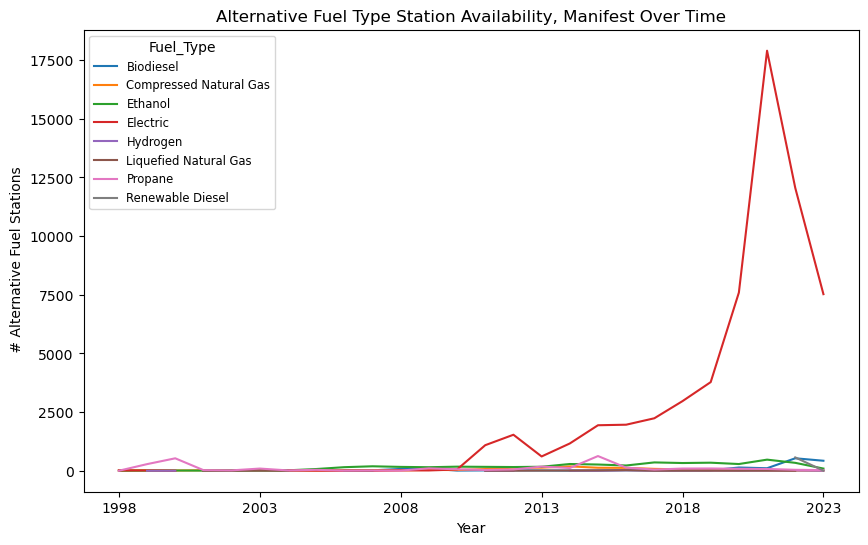

In [21]:
#TIME SERIES GRAPH: ALTERNATIVE FUEL TYPE STATION AVAILABILITY, MANIFEST OVER TIME
plt.rcParams["figure.figsize"]=(10,6)

fs_cnt=focused_data[["open_year","fuel_type_code"]].value_counts()
fs_cnt=fs_cnt.reset_index()
fs_cnt_pivot=fs_cnt.pivot(index="open_year",columns='fuel_type_code')
fs_cnt_pivot 

fs_cnt_pivot.plot(kind="line")

# Customize Legend
legend = plt.legend(title="Fuel_Type", loc='upper left', fontsize='small', fancybox=True)
legend.texts[0].set_text('Biodiesel')
legend.texts[1].set_text('Compressed Natural Gas')
legend.texts[2].set_text('Ethanol')
legend.texts[3].set_text('Electric')
legend.texts[4].set_text('Hydrogen')
legend.texts[5].set_text('Liquefied Natural Gas')
legend.texts[6].set_text('Propane')
legend.texts[7].set_text('Renewable Diesel')

# Title and Axis Labels
plt.title("Alternative Fuel Type Station Availability, Manifest Over Time")
plt.xlabel("Year")
plt.ylabel(" # Alternative Fuel Stations")
#plt.savefig("Time_Series_Stations_Fuel_Types.png")
plt.show()

In [22]:
# REMOVE ELECTRIC

# Define the desired time frame
begin_year="1998"
end_year="2023"

focus_years_no_elec = (fs_df["open_year"] >= begin_year) & (fs_df["open_year"] <= end_year) & (fs_df["fuel_type_code"]!="ELEC")

# Apply the filter to get the years of focus and REMOVE ELECTRIC
focused_data_no_elec = fs_df[focus_years_no_elec]
focused_data_no_elec

,_id,id,fuel_type_code,station_name,street_address,city,state,country,status_code,expected_date,...,latitude,longitude,open_date,date_last_confirmed,facility_type,restricted_access,fuel_name,station_count,new_open_date,open_year
1,64ce71f5e4c0a798bc65120b,124,CNG,Con Edison - W 29th St Service Center,281 11th Ave,New York,NY,US,E,NaN,...,41,-74,2014-05-01,2022-06-14,UTILITY,False,Compressed Natural Gas,1445,2014-05-01,2014
2,64ce71f5e4c0a798bc65120c,17,CNG,Spire - Montgomery Operations Center,2951 Chestnut St,Montgomery,AL,US,E,NaN,...,32,-86,2010-12-01,2023-04-06,STANDALONE_STATION,NaN,Compressed Natural Gas,1445,2010-12-01,2010
5,64ce71f5e4c0a798bc65120f,129,CNG,Con Edison - Van Nest Service Center,1615 Bronxdale Ave,Bronx,NY,US,E,NaN,...,41,-74,1998-01-15,2022-06-14,UTILITY,False,Compressed Natural Gas,1445,1998-01-15,1998
7,64ce71f5e4c0a798bc651211,125,CNG,Con Edison - E 16th St Service Center,700 E 16th St,New York,NY,US,E,NaN,...,41,-74,1998-01-15,2022-06-14,UTILITY,False,Compressed Natural Gas,1445,1998-01-15,1998
8,64ce71f5e4c0a798bc651212,108,CNG,Clean Energy - Greenpoint - National Grid,287 Maspeth Ave,Brooklyn,NY,US,E,NaN,...,41,-74,2016-07-15,2022-12-13,UTILITY,False,Compressed Natural Gas,1445,2016-07-15,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73150,64ce71f9e4c0a798bc662ffd,302777,E85,Meijer Gas #330,4905 Burbank Road,Wooster,OH,US,E,NaN,...,41,-82,2023-05-16,NaN,CONVENIENCE_STORE,False,Ethanol,4483,2023-05-16,2023
73471,64ce71f9e4c0a798bc66313e,303618,BD,Power Mart,572 W Lake St,Elmhurst,IL,US,E,NaN,...,42,-88,2017-10-15,NaN,CONVENIENCE_STORE,False,Biodiesel,1611,2017-10-15,2017
73473,64ce71f9e4c0a798bc663140,303621,E85,Isaac's North Star,925 Sinclair Lewis Ave,Sauk Centre,MN,US,E,NaN,...,46,-95,2023-07-27,NaN,GAS_STATION,False,Ethanol,4483,2023-07-27,2023
73616,64ce71f9e4c0a798bc6631cf,303894,LPG,Alliance AutoGas - Space Age Fuels,9515 Old Pacfic Hwy,Castle Rock,WA,US,E,NaN,...,46,-123,2023-08-01,NaN,FUEL_RESELLER,False,Propane,2815,2023-08-01,2023


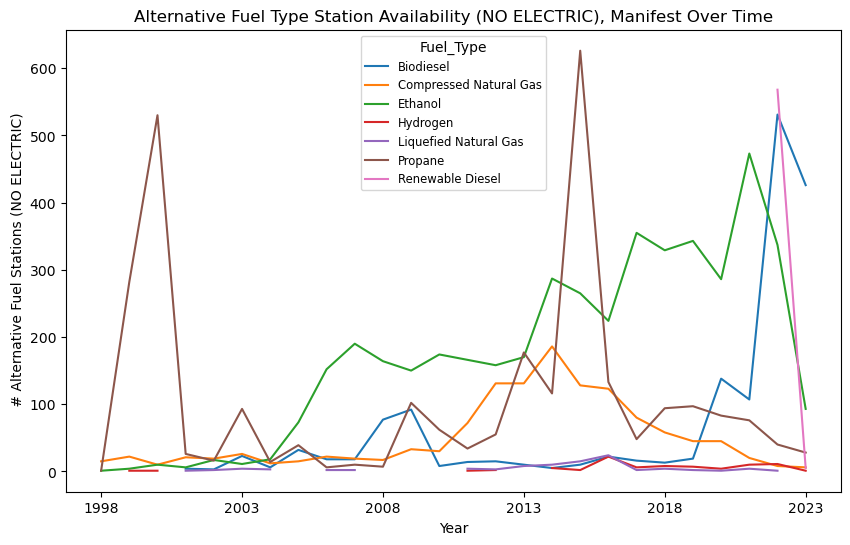

In [23]:
#TIME SERIES GRAPH: ALTERNATIVE FUEL TYPE STATION AVAILABILITY, MANIFEST OVER TIME  (ELECTRIC REMOVED)
plt.rcParams["figure.figsize"]=(10,6)

#fs_cnt=focused_data[["open_year","fuel_type_code"]].value_counts()
fs_ne_cnt=focused_data_no_elec[["open_year","fuel_type_code"]].value_counts()
fs_ne_cnt=fs_ne_cnt.reset_index()
fs_ne_cnt_pivot=fs_ne_cnt.pivot(index="open_year",columns='fuel_type_code')
fs_ne_cnt_pivot 

fs_ne_cnt_pivot.plot(kind="line")

# Customize Legend
legend = plt.legend(title="Fuel_Type", loc='upper center', fontsize='small', fancybox=True)
legend.texts[0].set_text('Biodiesel')
legend.texts[1].set_text('Compressed Natural Gas')
legend.texts[2].set_text('Ethanol')
legend.texts[3].set_text('Hydrogen')
legend.texts[4].set_text('Liquefied Natural Gas')
legend.texts[5].set_text('Propane')
legend.texts[6].set_text('Renewable Diesel')

# Title and Axis Labels
plt.title("Alternative Fuel Type Station Availability (NO ELECTRIC), Manifest Over Time")
plt.xlabel("Year")
plt.ylabel(" # Alternative Fuel Stations (NO ELECTRIC)")
#plt.savefig("Time_Series_Stations_Fuel_Types_NO_ELEC.png")
plt.show()

In [24]:
# QC CHECK - FUEL TYPE/FUEL NAME CROSSWALK WITH COUNTS
fuel_type_name=fs_df[["fuel_type_code","fuel_name"]].value_counts()
#fuel_type_name.to_csv("Fuel_Type_Count.csv")
fuel_type_name

fuel_type_code  fuel_name             
ELEC            Electric                  62646
E85             Ethanol                    4483
LPG             Propane                    2815
BD              Biodiesel                  1611
CNG             Compressed Natural Gas     1445
RD              Renewable Diesel            573
LNG             Liquefied Natural Gas       134
HY              Hydrogen                    127
dtype: int64

In [25]:
# QC CHECK - OPEN YEAR BY FUEL TYPE
ft_year_cnt = fs_df.groupby(["open_year", "fuel_name"]).size()
#ft_year_cnt.to_csv("Fuel_Type_Count_by_Year.csv")
ft_year_cnt

open_year  fuel_name       
1976       Ethanol              1
           Propane              1
1977       Ethanol              1
1978       Ethanol              1
1984       Ethanol              1
                               ..
2023       Ethanol             93
           Hydrogen             1
           Propane             28
           Renewable Diesel     5
2024       Electric             1
Length: 204, dtype: int64

In [26]:
# QC CHECK - ONLY ELECTRIC COUNT
elec_only = fs_df[(fs_df["fuel_type_code"]=="ELEC")]
elec_count=len(fs_df[(fs_df["fuel_type_code"]=="ELEC")])
elec_count

62646

In [27]:
# QC CHECK - ALL EXCEPT FOR ECLETRIC
no_elec = fs_df[(fs_df["fuel_type_code"]!="ELEC")]
no_elec_count=len(fs_df[(fs_df["fuel_type_code"]!="ELEC")])
no_elec_count

11188

In [28]:
# QC CHECK - ACCESS_CODE BREAKDOWN
access_cnt = fs_df["access_code"].value_counts()
#access_cnt.to_csv("Access_Code_Count.csv")
access_cnt           

public     68527
private     5305
Name: access_code, dtype: int64

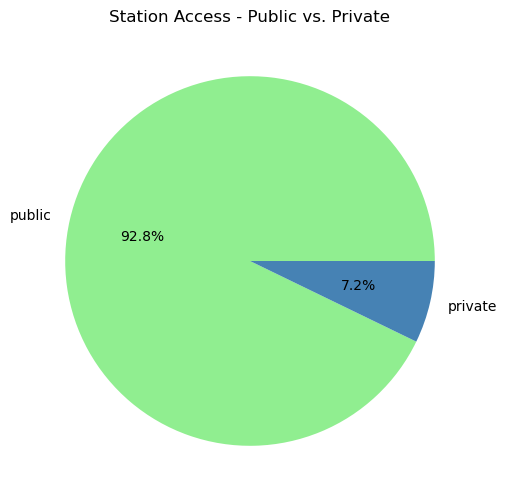

In [29]:
# PIE CHART: STATION ACCESS
access_cnt.plot.pie(autopct="%1.1f%%", colors=['lightgreen','steelblue'], title="Station Access - Public vs. Private")
plt.ylabel(None)
#plt.savefig("Access_Pie.png")
plt.show()

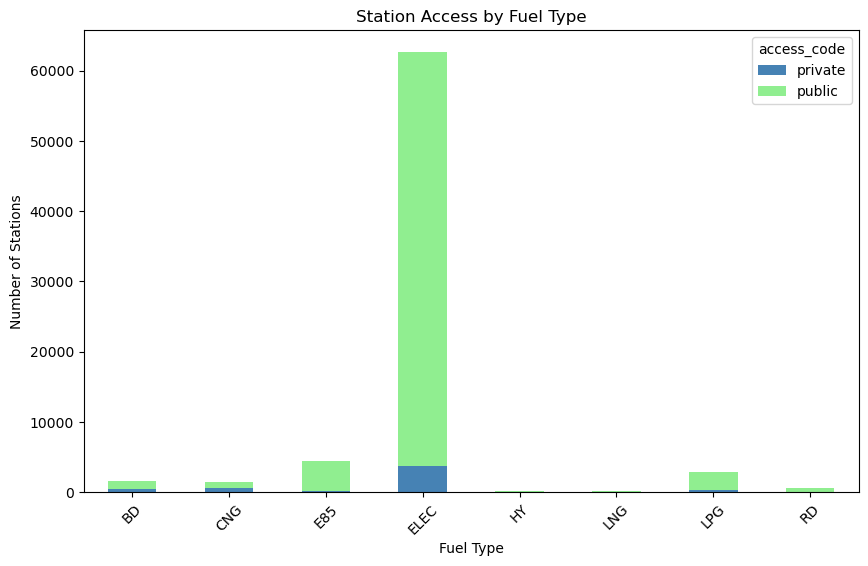

In [30]:
# STACK BAR: STATION ACCESS - BY FUEL TYPE
stck_access=fs_df.groupby(['fuel_type_code','access_code']).size().unstack().plot(kind='bar', stacked=True,
                color=['steelblue','lightgreen'], title="Station Access by Fuel Type")   

stck_access.set_xlabel("Fuel Type")
stck_access.set_ylabel("Number of Stations")

plt.xticks(rotation=45)
#plt.savefig("Access_Stack_Bar.png")
plt.show()

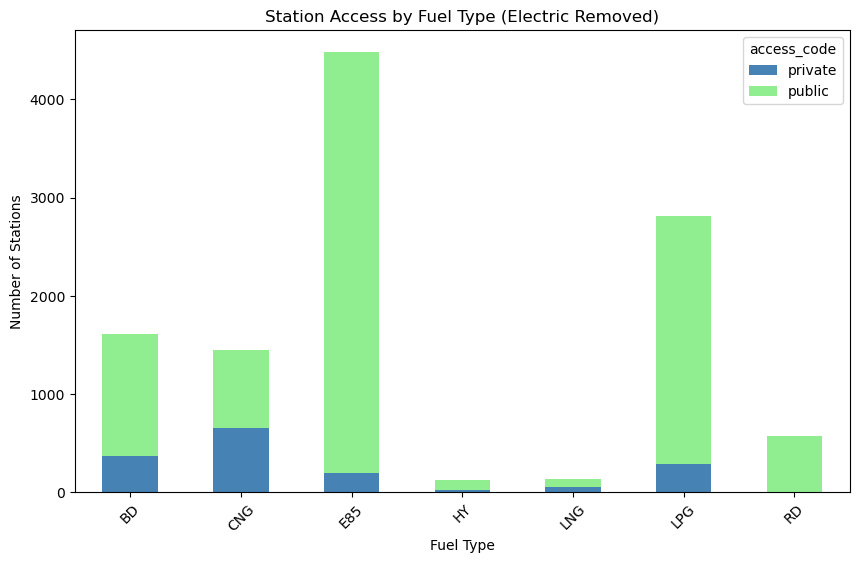

In [31]:
# STACK BAR: STATION ACCESS - BY FUEL TYPE (ELECTRIC REMOVED)
stck_access_no_elec=no_elec.groupby(['fuel_type_code','access_code']).size().unstack().plot(kind='bar', stacked=True,
                color=['steelblue','lightgreen'], title="Station Access by Fuel Type (Electric Removed)")   

stck_access_no_elec.set_xlabel("Fuel Type")
stck_access_no_elec.set_ylabel("Number of Stations")

plt.xticks(rotation=45)
#plt.savefig("Access_Stack_Bar_No_Elec.png")
plt.show()

In [32]:
# QC CHECK - STATUS_CODE BREAKDOWN
status_cnt = fs_df["status_code"].value_counts()
#status_cnt.to_csv("Status_Code_Count.csv")
status_cnt

E    69884
T     3757
P      193
Name: status_code, dtype: int64

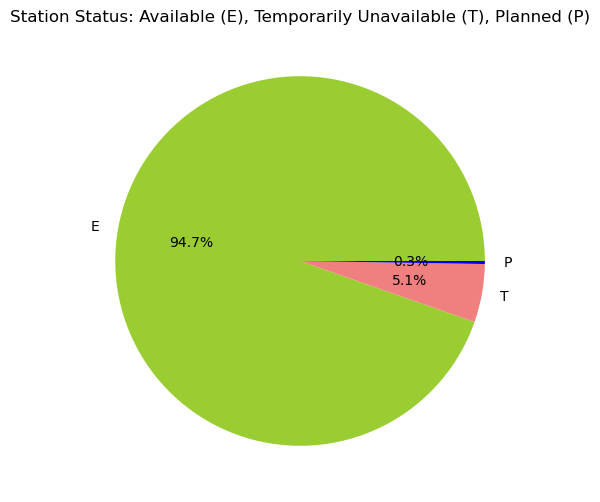

In [33]:
# PIE CHART: STATION STATUS
status_cnt.plot.pie(autopct="%1.1f%%", colors=['yellowgreen','lightcoral','blue'], title="Station Status: Available (E), Temporarily Unavailable (T), Planned (P)")
plt.ylabel(None)
# Save an image of our chart and print the final product to the screen
#plt.savefig("Status_Pie.png")
plt.show()

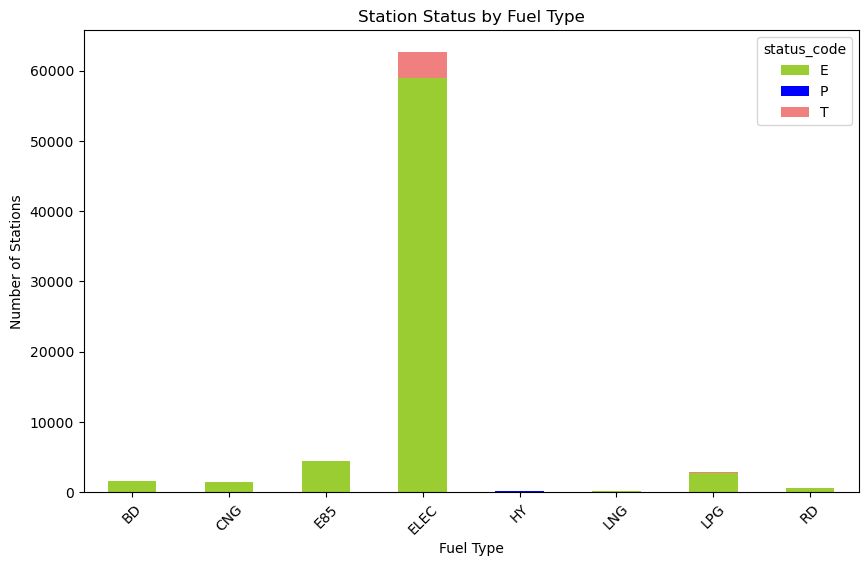

In [34]:
# STACK BAR: STATION STATUS - BY FUEL TYPE
stck_status=fs_df.groupby(['fuel_type_code','status_code']).size().unstack().plot(kind='bar', stacked=True,
                color=['yellowgreen','blue','lightcoral'], title="Station Status by Fuel Type")  

stck_status.set_xlabel("Fuel Type")
stck_status.set_ylabel("Number of Stations")

plt.xticks(rotation=45)
# Save an image of our chart and print the final product to the screen
#plt.savefig("Status_Stack_Bar.png")
plt.show()

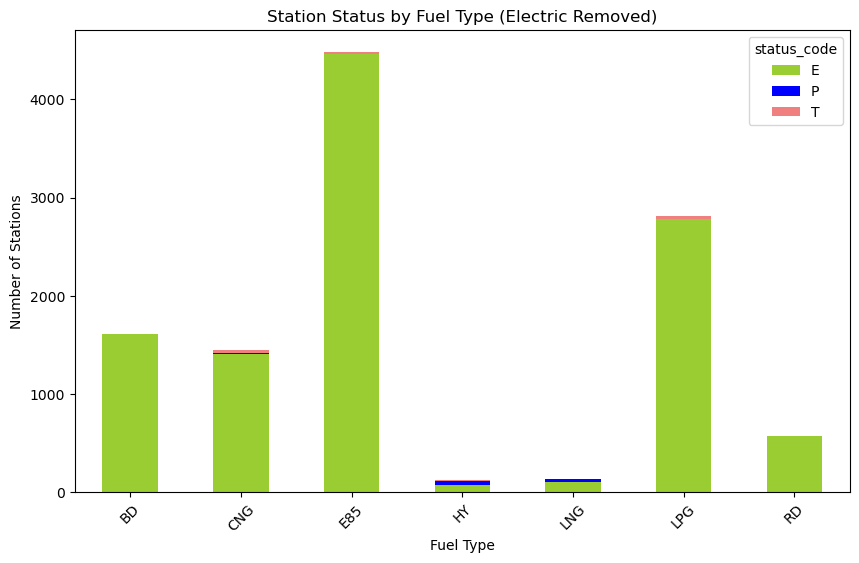

In [35]:
# STACK BAR: STATION STATUS - BY FUEL TYPE (ELECTRIC REMOVED)
stck_status_no_elec=no_elec.groupby(['fuel_type_code','status_code']).size().unstack().plot(kind='bar', stacked=True,
                color=['yellowgreen','blue','lightcoral'], title="Station Status by Fuel Type (Electric Removed)")  

stck_status_no_elec.set_xlabel("Fuel Type")
stck_status_no_elec.set_ylabel("Number of Stations")

plt.xticks(rotation=45)
# Save an image of our chart and print the final product to the screen
#plt.savefig("Status_Stack_Bar_No_Elec.png")
plt.show()

In [36]:
# QC CHECK -'BY STATE' ANALYSIS
state_counts = len(fs_df["state"].value_counts())
state_counts

51

In [37]:
# QC CHECK -'BY STATE' ANALYSIS
per_state_counts = fs_df["state"].value_counts()
#per_state_counts.to_csv("State_Charging_Station_Counts.csv")
per_state_counts

CA    18394
NY     4211
TX     3787
FL     3626
MA     2963
CO     2294
WA     2222
IL     2118
GA     2061
PA     1953
OH     1859
MD     1755
NC     1752
MI     1740
VA     1610
MN     1490
MO     1471
AZ     1354
OR     1285
NJ     1267
IA     1049
TN     1013
UT      965
WI      940
IN      871
CT      808
OK      706
KS      687
SC      669
NV      634
AL      508
ME      472
AR      467
HI      411
NE      411
KY      407
VT      398
DC      370
NM      365
LA      342
RI      341
NH      264
MS      246
ID      207
WV      201
DE      196
SD      186
ND      150
MT      138
WY      131
AK       64
Name: state, dtype: int64

In [38]:
# QC CHECK -'BY STATE' ANALYSIS
per_state_counts=fs_df["state"].value_counts()
per_state_counts.head(5)

CA    18394
NY     4211
TX     3787
FL     3626
MA     2963
Name: state, dtype: int64

In [39]:
# TOP FIVE STATES THAT UTILIZE ALTERNATIVE FUELS
states_top5 = fs_df["state"].value_counts().nlargest(5).index
states_top5

focus_top5_states = fs_df[fs_df["state"].isin(["CA","NY","TX","FL","MA"])]
focus_top5_states.head()

,_id,id,fuel_type_code,station_name,street_address,city,state,country,status_code,expected_date,...,latitude,longitude,open_date,date_last_confirmed,facility_type,restricted_access,fuel_name,station_count,new_open_date,open_year
1,64ce71f5e4c0a798bc65120b,124,CNG,Con Edison - W 29th St Service Center,281 11th Ave,New York,NY,US,E,NaN,...,41,-74,2014-05-01,2022-06-14,UTILITY,False,Compressed Natural Gas,1445,2014-05-01,2014
5,64ce71f5e4c0a798bc65120f,129,CNG,Con Edison - Van Nest Service Center,1615 Bronxdale Ave,Bronx,NY,US,E,NaN,...,41,-74,1998-01-15,2022-06-14,UTILITY,False,Compressed Natural Gas,1445,1998-01-15,1998
6,64ce71f5e4c0a798bc651210,130,CNG,Con Edison - Rye Service Center,178 Theodore Fremd Ave,Rye,NY,US,E,NaN,...,41,-74,1996-12-03,2022-06-14,UTILITY,False,Compressed Natural Gas,1445,1996-12-03,1996
7,64ce71f5e4c0a798bc651211,125,CNG,Con Edison - E 16th St Service Center,700 E 16th St,New York,NY,US,E,NaN,...,41,-74,1998-01-15,2022-06-14,UTILITY,False,Compressed Natural Gas,1445,1998-01-15,1998
8,64ce71f5e4c0a798bc651212,108,CNG,Clean Energy - Greenpoint - National Grid,287 Maspeth Ave,Brooklyn,NY,US,E,NaN,...,41,-74,2016-07-15,2022-12-13,UTILITY,False,Compressed Natural Gas,1445,2016-07-15,2016


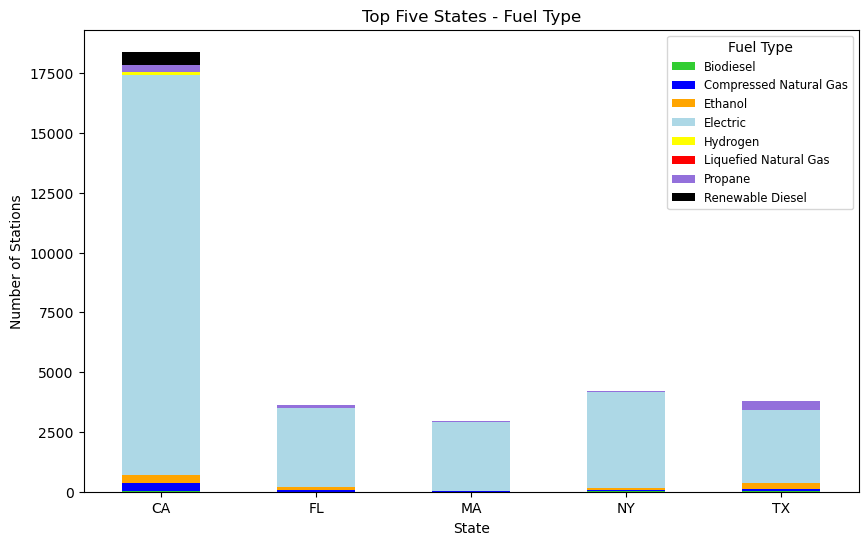

In [40]:
# STACK BAR: TOP 5 STATES THAT UTILIZE ALTERNATIVE - FUEL BY FUEL TYPE
stck_top5_states=focus_top5_states.groupby(['state','fuel_type_code']).size().unstack().plot(kind='bar', stacked=True,
                color=['limegreen','blue','orange','lightblue','yellow','red','mediumpurple','black'],
                title="Top Five States - Fuel Type")  

stck_top5_states.set_xlabel("State")
stck_top5_states.set_ylabel("Number of Stations")

# Customize Legend
legend = plt.legend(title="Fuel Type", loc='upper right', fontsize='small', fancybox=True)
legend.texts[0].set_text('Biodiesel')
legend.texts[1].set_text('Compressed Natural Gas')
legend.texts[2].set_text('Ethanol')
legend.texts[3].set_text('Electric')
legend.texts[4].set_text('Hydrogen')
legend.texts[5].set_text('Liquefied Natural Gas')
legend.texts[6].set_text('Propane')
legend.texts[7].set_text('Renewable Diesel')


plt.xticks(rotation=0)
# Save an image of our chart and print the final product to the screen
#plt.savefig("Top_5_States_Stack_Bar.png")
plt.show()

In [41]:
# REMOVE ELECTRIC
no_elec_top5 = focus_top5_states[(focus_top5_states["fuel_type_code"]!="ELEC")]
no_elec_top5_count=len(focus_top5_states[(focus_top5_states["fuel_type_code"]!="ELEC")])
no_elec_top5_count

3018

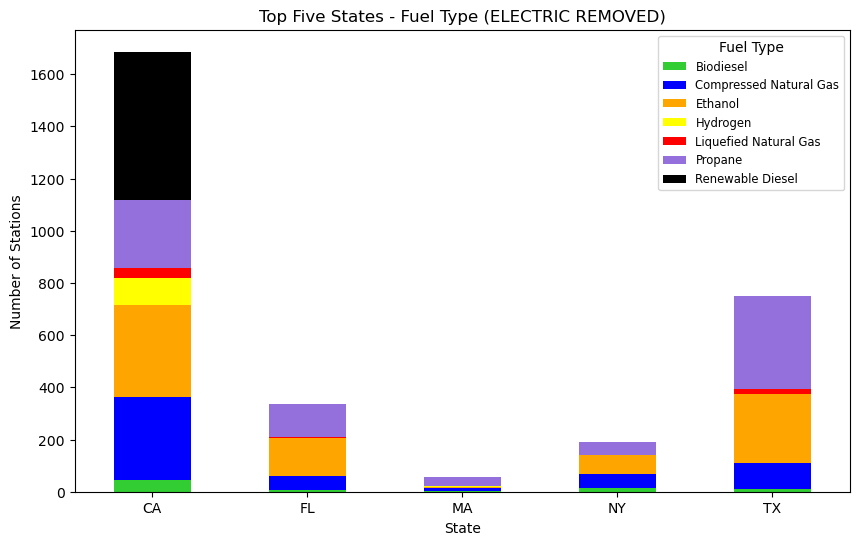

In [42]:
# STACK BAR: TOP 5 STATES THAT UTILIZE ALTERNATIVE - FUEL BY FUEL TYPE (ELECTRIC REMOVED)
stck_top5_states_ne=no_elec_top5.groupby(['state','fuel_type_code']).size().unstack().plot(kind='bar', stacked=True,
                color=['limegreen','blue','orange','yellow','red','mediumpurple','black'],
                title="Top Five States - Fuel Type (ELECTRIC REMOVED)")  

stck_top5_states_ne.set_xlabel("State")
stck_top5_states_ne.set_ylabel("Number of Stations")

# Customize Legend
legend = plt.legend(title="Fuel Type", loc='upper right', fontsize='small', fancybox=True)
legend.texts[0].set_text('Biodiesel')
legend.texts[1].set_text('Compressed Natural Gas')
legend.texts[2].set_text('Ethanol')
legend.texts[3].set_text('Hydrogen')
legend.texts[4].set_text('Liquefied Natural Gas')
legend.texts[5].set_text('Propane')
legend.texts[6].set_text('Renewable Diesel')

plt.xticks(rotation=0)
# Save an image of our chart and print the final product to the screen
#plt.savefig("Top_5_States_Stack_Bar_NO_ELEC.png")
plt.show()

In [43]:
#FACILITY_TYPE BREAKDOWN
facility_type_counts=fs_df["facility_type"].value_counts()
#facility_type_counts.to_csv("Facility_Type_Counts.csv")
facility_type_counts

CONVENIENCE_STORE    4871
HOTEL                2906
CAR_DEALER           2812
GAS_STATION          1768
FUEL_RESELLER        1109
                     ... 
MOTOR_POOL              5
STADIUM                 3
PHARMACY                3
WORKPLACE               3
TNC                     1
Name: facility_type, Length: 63, dtype: int64

In [44]:
# TOP 4 FACILITY TYPES THAT OFFER ALTERNATIVE FUEL
facility_type_counts.head(4)

CONVENIENCE_STORE    4871
HOTEL                2906
CAR_DEALER           2812
GAS_STATION          1768
Name: facility_type, dtype: int64

In [45]:
# ISOLATE TOP 4 FACILITY TYPES THAT OFFER ALTERNATIVE FUEL
facs_top4 = fs_df["facility_type"].value_counts().nlargest(4).index
facs_top4

focus_top4_facs = fs_df[fs_df["facility_type"].isin(["CONVENIENCE_STORE","HOTEL","CAR_DEALER","GAS_STATION"])]
focus_top4_facs.head()

,_id,id,fuel_type_code,station_name,street_address,city,state,country,status_code,expected_date,...,latitude,longitude,open_date,date_last_confirmed,facility_type,restricted_access,fuel_name,station_count,new_open_date,open_year
14,64ce71f5e4c0a798bc651218,248,CNG,Shell,131 Brainard Rd,Hartford,CT,US,T,2022-07-15,...,42,-73,NaN,2022-06-14,CONVENIENCE_STORE,False,Compressed Natural Gas,1445,NaT,NaN
28,64ce71f5e4c0a798bc651226,456,CNG,Clean Energy - Downtown Dallas,801 S Riverfront Blvd,Dallas,TX,US,E,NaN,...,33,-97,1996-12-15,2022-12-13,GAS_STATION,False,Compressed Natural Gas,1445,1996-12-15,1996
31,64ce71f5e4c0a798bc651229,558,CNG,Dominion Energy - Market Express Sinclair,850 S Carbon Ave,Price,UT,US,E,NaN,...,40,-111,1996-12-15,2023-04-06,CONVENIENCE_STORE,False,Compressed Natural Gas,1445,1996-12-15,1996
32,64ce71f5e4c0a798bc65122a,569,CNG,Questar Gas - Chevron,1375 N Main St,Richfield,UT,US,E,NaN,...,39,-112,1996-12-15,2023-04-06,GAS_STATION,False,Compressed Natural Gas,1445,1996-12-15,1996
33,64ce71f5e4c0a798bc65122b,548,CNG,Questar Gas - LW's Conoco,1050 W 200 N,Logan,UT,US,E,NaN,...,42,-112,1996-12-15,2023-04-06,CONVENIENCE_STORE,False,Compressed Natural Gas,1445,1996-12-15,1996


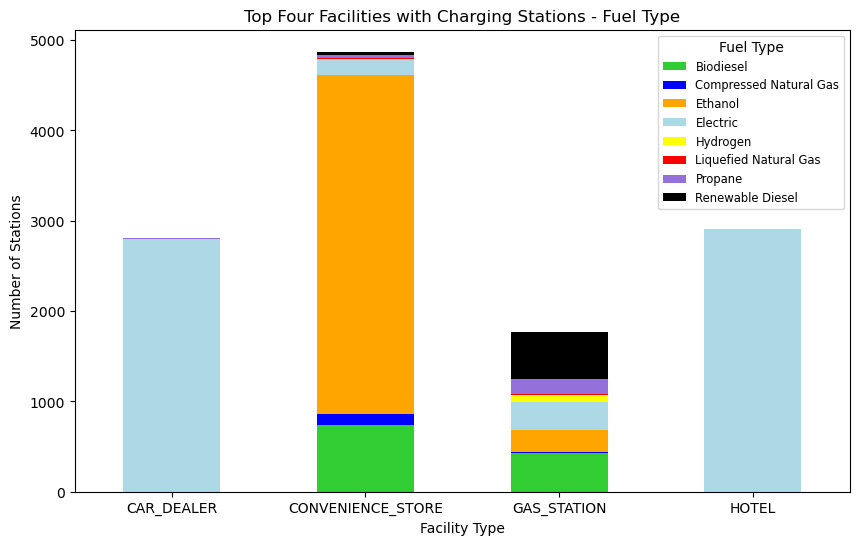

In [46]:
# STACK BAR: TOP 4 FACILITY TYPES BY FUEL TYPE
stck_top4_facs=focus_top4_facs.groupby(['facility_type','fuel_type_code']).size().unstack().plot(kind='bar', stacked=True,
                color=['limegreen','blue','orange','lightblue','yellow','red','mediumpurple','black'],
                title="Top Four Facilities with Charging Stations - Fuel Type")  

stck_top4_facs.set_xlabel("Facility Type")
stck_top4_facs.set_ylabel("Number of Stations")

# Customize Legend
legend = plt.legend(title="Fuel Type", loc='upper right', fontsize='small', fancybox=True)
legend.texts[0].set_text('Biodiesel')
legend.texts[1].set_text('Compressed Natural Gas')
legend.texts[2].set_text('Ethanol')
legend.texts[3].set_text('Electric')
legend.texts[4].set_text('Hydrogen')
legend.texts[5].set_text('Liquefied Natural Gas')
legend.texts[6].set_text('Propane')
legend.texts[7].set_text('Renewable Diesel')


plt.xticks(rotation=0)
# Save an image of our chart and print the final product to the screen
#plt.savefig("Top_4_Facilities_Stack_Bar.png")
plt.show()

In [48]:
# CONSTRUCT STATE POLITICAL-LEAN CROSSWALK BASED ON 2020 PRESIDENTIAL ELECTION
vote_mapping = {'CA':'Democrat',
                'NY':'Democrat',
                'TX':'Republican',
                'FL':'Republican',
                'MA':'Democrat',
                'CO':'Democrat',
                'WA':'Democrat',
                'IL':'Democrat',
                'GA':'Democrat',
                'PA':'Democrat',
                'OH':'Republican',
                'MD':'Democrat',
                'NC':'Republican',
                'MI':'Democrat',
                'VA':'Democrat',
                'MN':'Democrat',
                'MO':'Republican',
                'AZ':'Democrat',
                'OR':'Democrat',
                'NJ':'Democrat',
                'IA':'Republican',
                'TN':'Republican',
                'UT':'Republican',
                'WI':'Democrat',
                'IN':'Republican',
                'CT':'Democrat',
                'OK':'Republican',
                'KS':'Republican',
                'SC':'Republican',
                'NV':'Democrat',
                'AL':'Republican',
                'ME':'Democrat',
                'AR':'Democrat',
                'HI':'Democrat',
                'NE':'Republican',
                'KY':'Republican',
                'VT':'Democrat',
                'DC':'Democrat',
                'NM':'Democrat',
                'LA':'Republican',
                'RI':'Democrat',
                'NH':'Democrat',
                'MS':'Republican',
                'ID':'Republican',
                'WV':'Republican',
                'DE':'Democrat',
                'SD':'Republican',
                'ND':'Republican',
                'MT':'Republican',
                'WY':'Republican',
                'AK':'Republican'  
               }

fs_df=fs_df.assign(vote2020=fs_df.state.map(vote_mapping))
fs_df

,_id,id,fuel_type_code,station_name,street_address,city,state,country,status_code,expected_date,...,longitude,open_date,date_last_confirmed,facility_type,restricted_access,fuel_name,station_count,new_open_date,open_year,vote2020
0,64ce71f5e4c0a798bc65120a,73,CNG,Arkansas Oklahoma Gas Corp,2100 S Waldron Rd,Fort Smith,AR,US,E,NaN,...,-94,1997-01-01,2023-02-13,UTILITY,False,Compressed Natural Gas,1445,1997-01-01,1997,Democrat
1,64ce71f5e4c0a798bc65120b,124,CNG,Con Edison - W 29th St Service Center,281 11th Ave,New York,NY,US,E,NaN,...,-74,2014-05-01,2022-06-14,UTILITY,False,Compressed Natural Gas,1445,2014-05-01,2014,Democrat
2,64ce71f5e4c0a798bc65120c,17,CNG,Spire - Montgomery Operations Center,2951 Chestnut St,Montgomery,AL,US,E,NaN,...,-86,2010-12-01,2023-04-06,STANDALONE_STATION,NaN,Compressed Natural Gas,1445,2010-12-01,2010,Republican
3,64ce71f5e4c0a798bc65120d,45,CNG,Metropolitan Atlanta Rapid Transit Authority,2424 Piedmont Rd NE,Atlanta,GA,US,E,NaN,...,-84,1996-12-15,2023-01-10,FLEET_GARAGE,NaN,Compressed Natural Gas,1445,1996-12-15,1996,Democrat
4,64ce71f5e4c0a798bc65120e,64,CNG,United Parcel Service,270 Marvin Miller Dr,Atlanta,GA,US,E,NaN,...,-85,1997-01-01,2022-06-14,STANDALONE_STATION,NaN,Compressed Natural Gas,1445,1997-01-01,1997,Democrat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73829,64ce71f9e4c0a798bc6632a4,306460,ELEC,947 West St. Mary's Street (US-YHW-UU2-1A),947 West St. Mary's Street,Centerville,TX,US,E,NaN,...,-96,2023-08-05,2023-08-05,PUBLIC,NaN,Electric,62646,2023-08-05,2023,Republican
73830,64ce71f9e4c0a798bc6632a5,306461,ELEC,947 West St. Mary's Street (US-YHW-UU2-1B),947 West St. Mary's Street,Centerville,TX,US,E,NaN,...,-96,2023-08-05,2023-08-05,PUBLIC,NaN,Electric,62646,2023-08-05,2023,Republican
73831,64ce71f9e4c0a798bc6632a6,306462,ELEC,947 West St. Mary's Street (US-YHW-UU2-2A),947 West St. Mary's Street,Centerville,TX,US,E,NaN,...,-96,2023-08-05,2023-08-05,PUBLIC,NaN,Electric,62646,2023-08-05,2023,Republican
73832,64ce71f9e4c0a798bc6632a7,306463,ELEC,947 West St. Mary's Street (US-YHW-UU2-2C),947 West St. Mary's Street,Centerville,TX,US,E,NaN,...,-96,2023-08-05,2023-08-05,PUBLIC,NaN,Electric,62646,2023-08-05,2023,Republican


In [82]:
# QC CHECK -'STATE POLITICAL LEANING'
vote_cnt = fs_df["vote2020"].value_counts()
vote_cnt.to_csv("Number_of_Alt_Fuel_Stations_by_Political_Landscape.csv")
vote_cnt

Democrat      52383
Republican    21446
Name: vote2020, dtype: int64

In [53]:
fs_df=fs_df.assign(vote_cnt=fs_df['vote2020'].map(fs_df['vote2020'].value_counts()))
fs_df.head()

,_id,id,fuel_type_code,station_name,street_address,city,state,country,status_code,expected_date,...,open_date,date_last_confirmed,facility_type,restricted_access,fuel_name,station_count,new_open_date,open_year,vote2020,vote_cnt
0,64ce71f5e4c0a798bc65120a,73,CNG,Arkansas Oklahoma Gas Corp,2100 S Waldron Rd,Fort Smith,AR,US,E,NaN,...,1997-01-01,2023-02-13,UTILITY,False,Compressed Natural Gas,52383,1997-01-01,1997,Democrat,52383
1,64ce71f5e4c0a798bc65120b,124,CNG,Con Edison - W 29th St Service Center,281 11th Ave,New York,NY,US,E,NaN,...,2014-05-01,2022-06-14,UTILITY,False,Compressed Natural Gas,52383,2014-05-01,2014,Democrat,52383
2,64ce71f5e4c0a798bc65120c,17,CNG,Spire - Montgomery Operations Center,2951 Chestnut St,Montgomery,AL,US,E,NaN,...,2010-12-01,2023-04-06,STANDALONE_STATION,NaN,Compressed Natural Gas,21446,2010-12-01,2010,Republican,21446
3,64ce71f5e4c0a798bc65120d,45,CNG,Metropolitan Atlanta Rapid Transit Authority,2424 Piedmont Rd NE,Atlanta,GA,US,E,NaN,...,1996-12-15,2023-01-10,FLEET_GARAGE,NaN,Compressed Natural Gas,52383,1996-12-15,1996,Democrat,52383
4,64ce71f5e4c0a798bc65120e,64,CNG,United Parcel Service,270 Marvin Miller Dr,Atlanta,GA,US,E,NaN,...,1997-01-01,2022-06-14,STANDALONE_STATION,NaN,Compressed Natural Gas,52383,1997-01-01,1997,Democrat,52383


In [81]:
# QC CHECK -'STATE POLITICAL LEANING'
vote2020_state=fs_df[["state","vote2020"]].value_counts()
vote2020_state.to_csv("State_Vote2020_Crosswalk.csv")
vote2020_state

state  vote2020  
CA     Democrat      18394
NY     Democrat       4211
TX     Republican     3787
FL     Republican     3626
MA     Democrat       2963
CO     Democrat       2294
WA     Democrat       2222
IL     Democrat       2118
GA     Democrat       2061
PA     Democrat       1953
OH     Republican     1859
MD     Democrat       1755
NC     Republican     1752
MI     Democrat       1740
VA     Democrat       1610
MN     Democrat       1490
MO     Republican     1471
AZ     Democrat       1354
OR     Democrat       1285
NJ     Democrat       1267
IA     Republican     1049
TN     Republican     1013
UT     Republican      965
WI     Democrat        940
IN     Republican      871
CT     Democrat        808
OK     Republican      706
KS     Republican      687
SC     Republican      669
NV     Democrat        634
AL     Republican      508
ME     Democrat        472
AR     Democrat        467
HI     Democrat        411
NE     Republican      411
KY     Republican      407
VT     Dem

In [83]:
# QC CHECK -'STATE POLITICAL LEANING'
state_vote2020=fs_df[["vote2020","state"]].value_counts()
state_vote2020.to_csv("State_Crosswalk_Political_Groupby.csv")
state_vote2020

vote2020    state
Democrat    CA       18394
            NY        4211
Republican  TX        3787
            FL        3626
Democrat    MA        2963
            CO        2294
            WA        2222
            IL        2118
            GA        2061
            PA        1953
Republican  OH        1859
Democrat    MD        1755
Republican  NC        1752
Democrat    MI        1740
            VA        1610
            MN        1490
Republican  MO        1471
Democrat    AZ        1354
            OR        1285
            NJ        1267
Republican  IA        1049
            TN        1013
            UT         965
Democrat    WI         940
Republican  IN         871
Democrat    CT         808
Republican  OK         706
            KS         687
            SC         669
Democrat    NV         634
Republican  AL         508
Democrat    ME         472
            AR         467
            HI         411
Republican  NE         411
            KY         407
Democrat  

In [85]:
# QC CHECK -'STATE POLITICAL LEANING'
vote2020_cnt=fs_df[["vote2020"]].value_counts()
vote2020_cnt.to_csv("Total_Stations_by_Political_Landscape.csv")
vote2020_cnt

vote2020  
Democrat      52383
Republican    21446
dtype: int64

In [58]:
# QC CHECK -'STATE POLITICAL LEANING'
vote2020_cnt=fs_df[["vote2020"]].count()
dem2020_st_cnt=fs_df[]
rep2020_st_cnt=
#fuel_type_name.to_csv("Fuel_Type_Count.csv")
vote2020_cnt

vote2020    73829
dtype: int64

In [59]:
# QC CHECK -'STATE POLITICAL LEANING'
v_st_counts = len(fs_df["vote2020"].value_counts())
v_st_counts

2

In [89]:
# QC CHECK -'STATE POLITICAL LEANING'
per_state_vcnts10=fs_df["state"].value_counts()
per_state_vcnts10.to_csv("Top_10_State_Count.csv")
per_state_vcnts10.head(10)

CA    18394
NY     4211
TX     3787
FL     3626
MA     2963
CO     2294
WA     2222
IL     2118
GA     2061
PA     1953
Name: state, dtype: int64

In [72]:
# TOP 10 STATES UTILIZING ALTERNATIVE FUEL - POLITICAL LEANING
per_State_top10 = fs_df["state"].value_counts().nlargest(10).index
per_State_top10

focus_top10_states = fs_df[fs_df["state"].isin(["CA","NY","TX","FL","MA","CO","WA","IL","GA","PA"])]
focus_top10_states.head(10)

,_id,id,fuel_type_code,station_name,street_address,city,state,country,status_code,expected_date,...,open_date,date_last_confirmed,facility_type,restricted_access,fuel_name,station_count,new_open_date,open_year,vote2020,vote_cnt
1,64ce71f5e4c0a798bc65120b,124,CNG,Con Edison - W 29th St Service Center,281 11th Ave,New York,NY,US,E,NaN,...,2014-05-01,2022-06-14,UTILITY,False,Compressed Natural Gas,52383,2014-05-01,2014,Democrat,52383
3,64ce71f5e4c0a798bc65120d,45,CNG,Metropolitan Atlanta Rapid Transit Authority,2424 Piedmont Rd NE,Atlanta,GA,US,E,NaN,...,1996-12-15,2023-01-10,FLEET_GARAGE,NaN,Compressed Natural Gas,52383,1996-12-15,1996,Democrat,52383
4,64ce71f5e4c0a798bc65120e,64,CNG,United Parcel Service,270 Marvin Miller Dr,Atlanta,GA,US,E,NaN,...,1997-01-01,2022-06-14,STANDALONE_STATION,NaN,Compressed Natural Gas,52383,1997-01-01,1997,Democrat,52383
5,64ce71f5e4c0a798bc65120f,129,CNG,Con Edison - Van Nest Service Center,1615 Bronxdale Ave,Bronx,NY,US,E,NaN,...,1998-01-15,2022-06-14,UTILITY,False,Compressed Natural Gas,52383,1998-01-15,1998,Democrat,52383
6,64ce71f5e4c0a798bc651210,130,CNG,Con Edison - Rye Service Center,178 Theodore Fremd Ave,Rye,NY,US,E,NaN,...,1996-12-03,2022-06-14,UTILITY,False,Compressed Natural Gas,52383,1996-12-03,1996,Democrat,52383
7,64ce71f5e4c0a798bc651211,125,CNG,Con Edison - E 16th St Service Center,700 E 16th St,New York,NY,US,E,NaN,...,1998-01-15,2022-06-14,UTILITY,False,Compressed Natural Gas,52383,1998-01-15,1998,Democrat,52383
8,64ce71f5e4c0a798bc651212,108,CNG,Clean Energy - Greenpoint - National Grid,287 Maspeth Ave,Brooklyn,NY,US,E,NaN,...,2016-07-15,2022-12-13,UTILITY,False,Compressed Natural Gas,52383,2016-07-15,2016,Democrat,52383
9,64ce71f5e4c0a798bc651213,84,CNG,Clean Energy - Everett - National Grid,16 Rover St,Everett,MA,US,E,NaN,...,1996-11-15,2022-12-13,STANDALONE_STATION,False,Compressed Natural Gas,52383,1996-11-15,1996,Democrat,52383
10,64ce71f5e4c0a798bc651214,112,CNG,Canarsie - National Grid,8424 Ditmas Ave,Brooklyn,NY,US,E,NaN,...,1988-01-15,2022-12-13,UTILITY,False,Compressed Natural Gas,52383,1988-01-15,1988,Democrat,52383
12,64ce71f5e4c0a798bc651216,132,CNG,Con Edison - College Point Service Center,124-15 31st Ave,Queens,NY,US,E,NaN,...,1998-01-15,2022-06-14,UTILITY,False,Compressed Natural Gas,52383,1998-01-15,1998,Democrat,52383


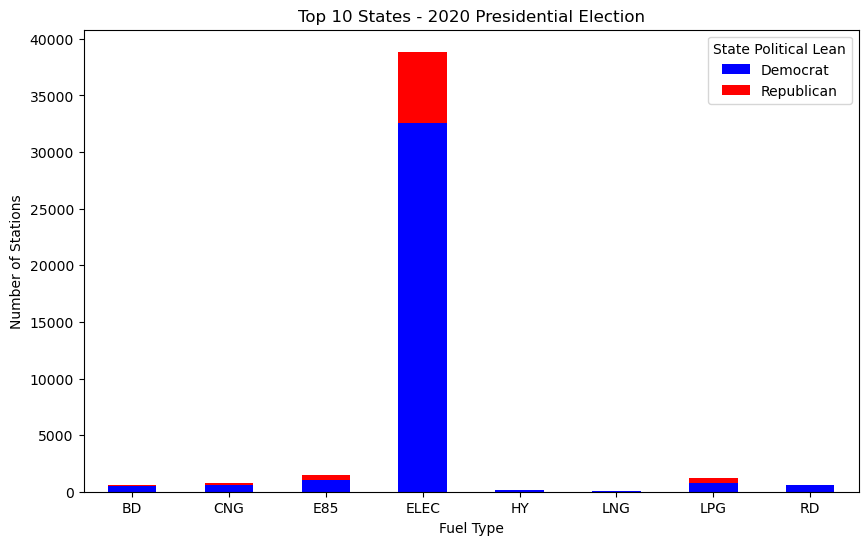

In [79]:
# STACK BAR: TOP 10 STATES - 2020 PRESIDENTIAL ELECTION
stck_top10_states=focus_top10_states.groupby(['fuel_type_code','vote2020']).size().unstack().plot(kind='bar', stacked=True,
                color=['blue','red'],
                title="Top 10 States - 2020 Presidential Election")  

stck_top10_states.set_xlabel("Fuel Type")
stck_top10_states.set_ylabel("Number of Stations")

# Customize Legend
legend = plt.legend(title="State Political Lean", loc='upper right', fontsize='medium', fancybox=True)
legend.texts[0].set_text('Democrat')
legend.texts[1].set_text('Republican')

plt.xticks(rotation=0)
# Save an image of our chart and print the final product to the screen
plt.savefig("Top_10_States_Politics_Stack_Bar.png")
plt.show()

In [77]:
# REMOVE ELECTRIC
no_elec_top10 = focus_top10_states[(focus_top10_states["fuel_type_code"]!="ELEC")]
no_elec_top10_count=len(focus_top10_states[(focus_top10_states["fuel_type_code"]!="ELEC")])
no_elec_top10_count

4767

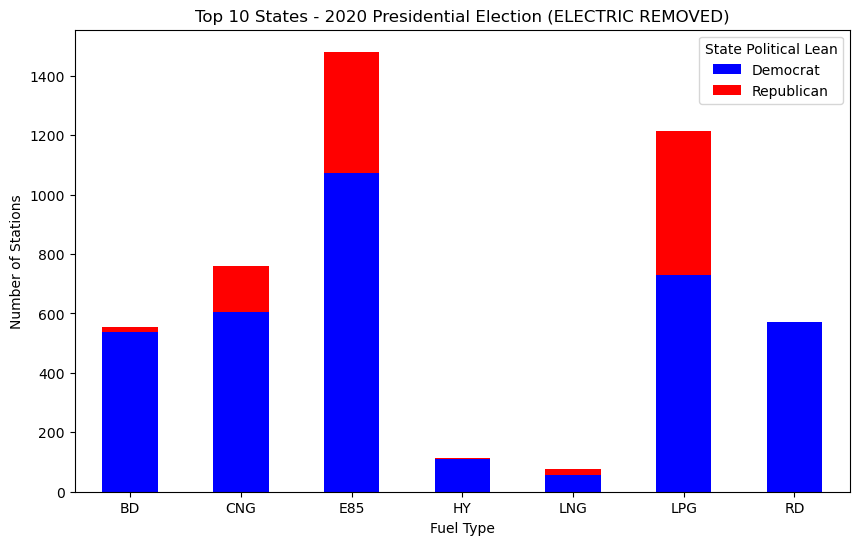

In [80]:
# STACK BAR: TOP 10 STATES - 2020 PRESIDENTIAL ELECTION (ELECTRIC REMOVED)
stck_top10_states_ne=no_elec_top10.groupby(['fuel_type_code','vote2020']).size().unstack().plot(kind='bar', stacked=True,
                color=['blue','red'],
                title="Top 10 States - 2020 Presidential Election (ELECTRIC REMOVED)")  

stck_top10_states_ne.set_xlabel("Fuel Type")
stck_top10_states_ne.set_ylabel("Number of Stations")

# Customize Legend
legend = plt.legend(title="State Political Lean", loc='upper right', fontsize='medium', fancybox=True)
legend.texts[0].set_text('Democrat')
legend.texts[1].set_text('Republican')

plt.xticks(rotation=0)
# Save an image of our chart and print the final product to the screen
plt.savefig("Top_10_States_Politics_Stack_Bar_NO_ELEC.png")
plt.show()